In [18]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, Reshape
from tensorflow.keras.datasets import mnist
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [3]:
(x_train,_),(x_test,_)=mnist.load_data()


In [9]:
x_train=x_train.reshape(len(x_train), -1)/255.0
x_test=x_test.reshape(len(x_test), -1)/255.0

In [10]:
input_image=Input(shape=(784,))
encoded=Dense(256,activation='relu')(input_image)
encoded=Dense(128,activation='relu',activity_regularizer=regularizers.l1(2e-4))(encoded)
encoded=Dense(64,activation='relu')(encoded)
latent=Dense(32,activation='relu')(encoded)
decoded=Dense(64,activation='relu')(latent)
decoded=Dense(128,activation='relu')(decoded)
decoded=Dense(256,activation='relu')(decoded)
output_image=Dense(784,activation='sigmoid')(decoded)

In [11]:
autoencoder=Model(input_image,output_image)

In [13]:
autoencoder.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [15]:
history=autoencoder.fit(x_train,x_train,epochs=10,validation_data=(x_test,x_test))

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1784 - accuracy: 0.0093 - val_loss: 0.1409 - val_accuracy: 0.0110
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1337 - accuracy: 0.0106 - val_loss: 0.1267 - val_accuracy: 0.0109
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1231 - accuracy: 0.0110 - val_loss: 0.1178 - val_accuracy: 0.0118
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1168 - accuracy: 0.0106 - val_loss: 0.1140 - val_accuracy: 0.0111
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1131 - accuracy: 0.0125 - val_loss: 0.1109 - val_accuracy: 0.0121
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1101 - accuracy: 0.0125 - val_loss: 0.1079 - val_accuracy: 0.0140
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1076 - accuracy: 0.0116 - val_loss: 0.1060 - val_ac

In [16]:
predictions=autoencoder.predict(x_test)

313/313 [==============================] - 1s 3ms/step


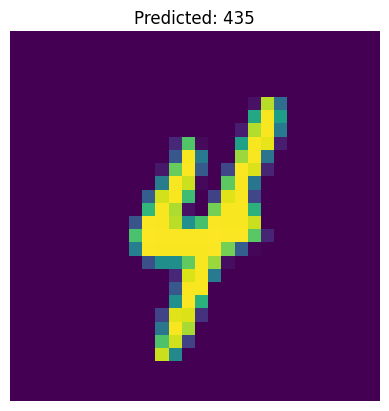

In [21]:
idx=random.randint(0,len(x_test)-1)
plt.imshow(x_test[idx].reshape(28,28))
plt.title(f"Predicted: {np.argmax(predictions[idx])}")
plt.axis('off')
plt.show()